In [1]:
%matplotlib inline

from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

from turtleEngine import BacktestingEngine

In [2]:
engine = BacktestingEngine()
engine.setPeriod(datetime(2015, 1, 1), datetime(2018, 11, 9))
engine.initPortfolio('setting.csv', 10000000)

In [3]:
engine.loadData()
engine.runBacktesting()
engine.calculateResult()

15:23:05.294000:IF99数据加载完成，总数据量：940
15:23:05.323000:I99数据加载完成，总数据量：940
15:23:05.348000:CU99数据加载完成，总数据量：940
15:23:05.375000:TA99数据加载完成，总数据量：940
15:23:05.375000:全部数据加载完成


In [ ]:
for dt, l in engine.tradeDict.items():
    print dt
    for trade in l:
        print trade.vtSymbol, trade.direction, trade.offset, trade.price, trade.volume

In [ ]:
for result in engine.resultList:
    if result.totalPnl:
        print result.date, result.totalPnl

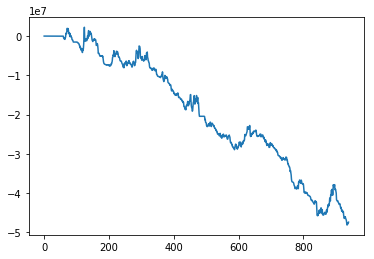

In [4]:
l = [result.totalPnl for result in engine.resultList]
equity = np.cumsum(l)
plt.plot(equity)